In [12]:
# Include the ggplot plotting library
library(ggplot2)

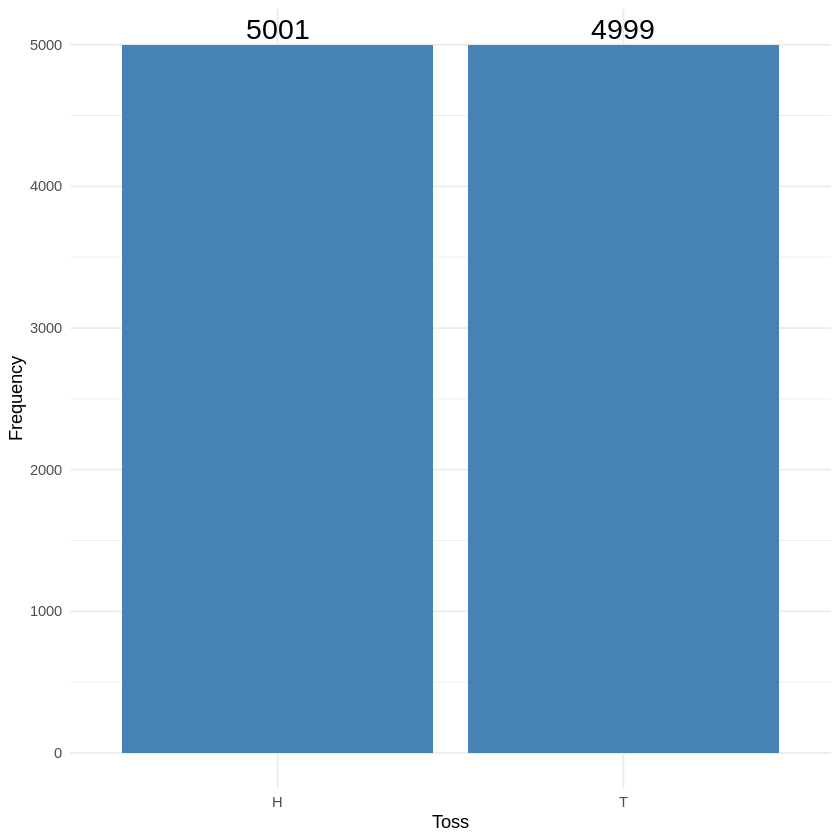

In [13]:
# Probability from a frequency perspective (Monte-Carlo Simulation)

# Sampling- (as well as sample-) space for a single fair-coin toss
S = c('H', 'T')

# Assign probabilities to outcomes based on intuition
p = c(0.5, 0.5)

# Samples representing outcomes of the experiment of selecting 1 object from
# the sampling space with replacement - this corresponds to generating outcomes
# of the random experiment of tossing a single fair coin
#set.seed(1)
samplesize = 1e04
simulatedData = sample(S, size = samplesize, replace = TRUE, prob = p)
#print(simulatedData)
# Create dataframe comprising frequency of each possible outcome in the sample space
df= as.data.frame(table(simulatedData))
colnames(df) = c('Toss', 'Frequency')
#print(table(simulatedData))
#print(df)

# Frequency plot
p = ggplot(data = df, aes(x = Toss, y = Frequency)) +
  geom_bar(stat = 'identity', fill="steelblue") +
  geom_text(aes(label = Frequency), vjust = -0.3, size = 6) +
  theme_minimal()

p  

In [21]:
# Scenario: toss two fair-coins. What is the probability that heads
# shows up exactly once.

# Theoretical approach: 
# Step-1: sample space S = {'HH', 'HT', 'TH', 'TT'}
# Step-2: are the outcomes in the sample space equally likely? yes.
# Step-3: event E = {'HT', 'TH'}
# Step-4: p(E) = n(E)/n = 2/4 = 1/2 = 0.5

# Monte-Carlo Simulation:
# Perform the experiment of tossing two-fair coins a large number of times
# and see what fraction of times heads shows up exactly once. We do this by
# simulating the outcomes in the sample space (tossing two fair-coins) by using 
# a much simpler sampling space (tossing one fair-coin).

# Monte-Carlo simulation based directly on the theoretical sample space
# corresponding to tossing two fair coins once)
S = c('HH', 'HT', 'TH', 'TT')

# Assign probabilities
p = c(1/4, 1/4, 1/4, 1/4)

# Compute approximate probability as exercise

# Monte-Carlo simulation based on a simpler sampling space corresponding to the
# random experiment of tossing a single fair-coin 
S = c('H', 'T')

# Assign probabilities to outcomes based on intuition
p = c(0.5, 0.5)

# Samples representing outcomes of the experiment of selecting 1 object from
# the sampling space with replacement - this corresponds to generating outcomes
# of the random experiment of tossing two fair coins once
samplesize = 1e04
simulatedData = replicate(samplesize, sample(S, size = 2, replace = TRUE, prob = p))
#print(simulatedData)

# Function to check if heads appears exactly once 
checkEvent = function(coindata){
  if (length(unique(coindata)) == 2){
    return(1)
  }
  else{
    return(0)
  }
}

# Calculate approximate probability of heads appearing exactly twice
approximate_probability = sum(apply(simulatedData, 2, checkEvent)) / samplesize
print(approximate_probability)

[1] 0.501


In [22]:
somearray = c('copper', 'silver', 'copper', 'gold', 'gold', 'silver', 'platinum')
length(unique(somearray)) # number of unique elements

[1] 4

In [25]:
# Scenario: we can get 3 scoops on a cone. There are 10 different flavors.
# What is the probability that we get three different flavors on the cone.

# Theoretical approach: 
# Step-1: sample space S = {'(vanilla, pista, strawberry)', '(vanilla, vanilla, pista)',
#                           '(vanilla, pista, vanilla)', ...............}
# We have a sample space where we sample with replacement from the set of 10 flavors
# F = {'vanilla', 'pista', 'strawberry',.........} with order matters.
# Step-2: are the outcomes in the sample space equally likely? yes.
# Step-3: event E = {'(vanilla, pista, strawberry)', '(vanilla, strawberry, pista),...'}
# Step-4: p(E) = n(E)/n = (10P3)/(10^3) = (choose(10, 3)*factorial(3)) / (10^3) = 0.72

# Monte-Carlo simulation based on a simpler sampling space corresponding to the
# random experiment of choosing a flavor from 10 flavors
S = c('vanilla', 'pista', 'strawberry', 'chocolate', 'blackberry',
 'blueberry', 'mango', 'sitaphal', 'chickoo', 'jack fruit')

# Corresponding probabilities
n = length(S)
p = (1/n)*replicate(n, 1)

# Samples representing outcomes of the experiment of selecting 3 objects from
# the sampling space with replacement - this corresponds to generating outcomes
# of the random experiment of selecting 3 flavors from the 10 available
samplesize = 1e04
simulatedData = replicate(samplesize, sample(S, size = 3, replace = TRUE, prob = p))
#print(simulatedData)

#apply(simulatedData, 1, unique)
#lengths(apply(simulatedData, 1, unique))
#print(lengths(apply(simulatedData, 1, unique)) == 3)
#sum(lengths(apply(simulatedData, 1, unique)) == 3)

# Approximate probability of getting 3 distinct flavors
approximate_probability = sum(lengths(apply(simulatedData, 2, unique)) == 3) /samplesize
print(approximate_probability)

[1] 0.7217


In [32]:
# Scenario: I have 10 coins in my pocket; 3 are copper and 7 are silver.
# I take out 4 coins, one after another. What is the probability that
# all 4 coins are silver

# Theoretical approach: 
# Step-1: sample space S = {(c1,c2,s1,c3), (c1,c3,s2,c5), (c1,c2,c3,c4), (s1,s2,s3,s4), (c1,s1,c3,s3),....}
# We have a sample space wherein each outcome can be thought of selecting from the
# sampling space {'c1', 'c2', 'c3', 's1', 's2', 's2', 's4', 's5', 's6', 's7'} 4 objects without replacement
# Step-2: are the outcomes in the sample space equally likely? yes.
# Step-3: event E = {'(s1,s2,s3,s4),....'}
# Step-4: p(E) = n(E)/n = (7C4) / (10C4) = 1/6.

# Monte-Carlo simulation based on a simpler sampling space corresponding to the
# random experiment of choosing a coin from 10 coins
S = c(replicate(3, 'copper'), replicate(7, 'silver'))

# Corresponding probabilities
n = length(S)
p = (1/n)*replicate(n, 1)

# Samples representing outcomes of the experiment of selecting 4 objects from
# the sampling space without replacement - this corresponds to generating outcomes
# of the random experiment of selecting 4 coins from the 10 available without replacement. 
samplesize = 1e05
simulatedData = replicate(samplesize, sample(S, size = 4, replace = FALSE, prob = p))
#print(simulatedData)

# Function to check if two silver and two copper coins are selected 
checkEvent = function(coindata){
  #if (sum(coindata == 'silver') == 4){
  #if (sum(coindata == 'silver') == 2){  
  if ((coindata[1] == 'silver') & (coindata[2] == 'silver') 
  & (coindata[3] == 'copper') & (coindata[4] == 'copper')){  
    return(1)
  }
  else{
    return(0)
  }
}

# Calculate approximate probability of all four coins being silver
approximate_probability = sum(apply(simulatedData, 2, checkEvent)) / samplesize
print(approximate_probability)


[1] 0.04977
